In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

with open('/Users/MaxAlex/Desktop/climate_videos_new.json', 'r') as f:
    data = f.readlines()

json_data = [json.loads(line) for line in data]

df = pd.DataFrame(json_data)

# our keywords list
keywords = ['climate change', 'global warming', 'greenhouse gases', 'rising sea levels',
    'extreme weather', 'temperature increase', 'climate action', 
    'carbon emissions', 'renewable energy', 'sustainable living',
    'climate science', 'climate crisis', 'climate adaptation',
    'natural disaster', 'extreme heat', 'melting ice cap', 'sea level rise',
    'biodiversity loss', 'deforestation', 'ocean acidification', 'climate policy', 
    'environmental policy',
    'disaster recovery', 'climate refugees',
    'carbon footprint', 'sustainable development', 'green technology',
    'renewable resource', 'eco-friendly',
    'ecosystem disruption', 'impact on climate',
    'paris agreement', 'climate awareness',
    'environmental justice', 'clean energy', 'zero carbon',
    'green infrastructure', 'ozone layer',
    'pollution', 'water scarcity', 'climate education'] 

#Defining weight for each keyword
keyword_weight = {
    'climate change': 5,
    'global warming': 5,
    'greenhouse gases': 4,
    'rising sea levels': 2,
    'extreme weather': 2,
    'temperature increase': 1,
    'climate action': 3,
    'carbon emissions': 3,
    'renewable energy': 3,
    'sustainable living': 2,
    'climate science': 5,
    'climate crisis': 5,
    'climate adaptation': 2,
    'natural disaster': 1,
    'extreme heat': 2,
    'melting ice cap': 4,
    'sea level rise': 3,
    'biodiversity loss': 4,
    'deforestation': 2,
    'ocean acidification': 2,
    'climate policy': 4,
    'environmental policy': 4,
    'disaster recovery': 1,
    'climate refugees': 4,
    'carbon footprint': 3,
    'sustainable development': 2,
    'green technology': 2,
    'renewable resource': 2,
    'eco-friendly': 3,
    'ecosystem disruption': 3,
    'impact on climate': 4,
    'paris agreement': 5,
    'climate awareness': 4,
    'environmental justice': 4,
    'clean energy': 3,
    'zero carbon': 2,
    'green infrastructure': 2,
    'ozone layer': 4,
    'pollution': 3,
    'water scarcity': 4,
    'climate education': 4 }

#Defining required scores per category
category_weight = {
    'Travel & Events': 2,
    'Science & Technology': 1,
    'Education': 1,
    'Pets & Animals': 3,
    'People & Blogs': 2,
    'Comedy': 3,
    'Entertainment': 3,
    'News & Politics': 1,
    'Howto & Style': 3,
    'Sports': 3,
    'Autos & Vehicles': 3,
    'Music': 3,
    'Gaming': 3,
    'Film & Animation': 2,
    'Nonprofits & Activism': 1,
    '':3 }

#Defining Weight for title, tags and descrption
other_weight = {
    'title': 3,
    'tags': 2,
    'description': 1}



In [8]:
# Function to count the number of points per category for each video
def count_points(row):
    points = 0
    category = row['categories']
    
    # Check each keyword and its associated score for the video's category
    for keyword, weight in keyword_weight.items():
        keyword_lower = keyword.lower()
        if keyword_lower in row['title'].lower():
            points += weight * other_weight['title']
        elif keyword_lower in row['tags'].lower():
            points += weight * other_weight['tags']
        elif keyword_lower in row['description'].lower():
            points += weight * other_weight['description']
    
    return points > category_weight.get(category, 0)

# Apply the function to filter the dataset
filtered_videos = df[df.apply(count_points, axis=1)]


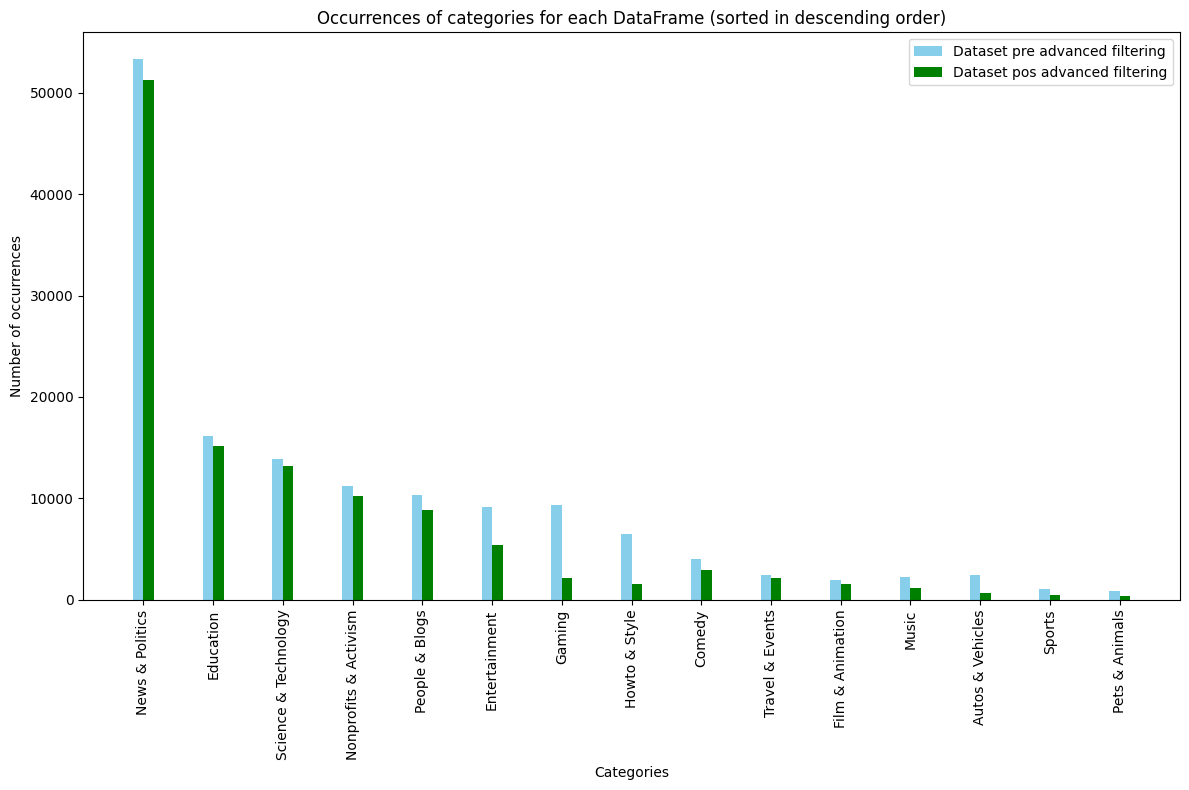

In [12]:
# filtered_dfs_list is a list of filtered DataFrames
filtered_dfs_list = [df, filtered_videos]
colors = ['skyblue', 'green']

# Creating an overall index of all categories from all DataFrames
categories = set()
for filtered_df in filtered_dfs_list:
    categories.update(filtered_df['categories'].unique())

categories.discard('')  # Remove empty categories ('')

# Creating a list of categories sorted in descending order based on the number of occurrences
category_counts = {category: sum(df['categories'].eq(category).sum() for df in filtered_dfs_list) for category in categories}
sorted_categories = sorted(categories, key=category_counts.get, reverse=True)

plt.figure(figsize=(12, 8))  # Adjusting the size of the graph

# Width of the bars for each category
bar_width = 0.15

# Creating a list of positions for the bars for each category
bar_positions = np.arange(len(sorted_categories))

# Plotting bars for each sorted category and each filtered DataFrame
for i, filtered_df in enumerate(filtered_dfs_list):
    category_counts = filtered_df['categories'].value_counts()

    # Creating a dictionary for the counts of each category, filling missing values with 0
    category_counts_dict = category_counts.to_dict()
    category_counts_full = {category: category_counts_dict.get(category, 0) for category in sorted_categories}

    # Shifting the position of bars for each DataFrame
    plt.bar(bar_positions + i * bar_width, [category_counts_full[category] for category in sorted_categories], width=bar_width, color=colors[i], label=f'Filter {i+1}')

# Plot of a histogram comparing the occurrence of categories for each DataFrame (sorted in descending order)
plt.title('Occurrences of categories for each DataFrame (sorted in descending order)')  
plt.xlabel('Categories')  
plt.ylabel('Number of occurrences')  
plt.xticks(bar_positions + (len(filtered_dfs_list) - 1) * bar_width / 2, sorted_categories, rotation=90)  
plt.legend(['Dataset pre advanced filtering', 'Dataset pos advanced filtering'])  
plt.tight_layout()  
plt.show()
